In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset in panda's dataframe

df = pd.read_csv('train_loan.csv')
df1 = pd.read_csv('test_loan1.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,N
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Y


# Data Pre-processing

In [5]:
#identifying null values in train set

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#identifying null values in test set

df1.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan_Status          10
dtype: int64

In [7]:
# Dropping duplicates in train data
df = df.drop_duplicates(keep='first')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
# Dropping duplicates in test data
df1 = df1.drop_duplicates(keep='first')
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,N
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Y


In [9]:
# Applying mean/median/mode imputation to both sets

df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)
df1['Gender'].fillna(df1['Gender'].mode()[0],inplace = True)

df['Married'].fillna(df['Married'].mode()[0],inplace = True)

df['Dependents'].fillna(df['Dependents'].mode()[0],inplace = True)
df1['Dependents'].fillna(df1['Dependents'].mode()[0],inplace = True)

df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace = True)
df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0],inplace = True)

df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace = True)
df1['LoanAmount'].fillna(df1['LoanAmount'].mean(),inplace = True)

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace = True)
df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mean(),inplace = True)

df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace = True)
df1['Credit_History'].fillna(df1['Credit_History'].mode()[0],inplace = True)

df1['Loan_Status'].fillna(df1['Loan_Status'].mode()[0],inplace = True)

In [10]:
# train data check
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
# test data check
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Hot Encoding and Feature Scaling

In [12]:
df.drop(columns = 'Loan_ID',inplace = True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [13]:
df1.drop(columns='Loan_ID',inplace = True)
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,Y
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,N
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Y


In [14]:
# Hot Encoding
# We will use the label encoder to encode gender
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # instantiate label encoder in an object le
df['Gender'] =le.fit_transform(df['Gender'])
df1['Gender'] =le.fit_transform(df1['Gender'])

In [15]:
# We will use the label encoder to encode marriage status
from sklearn.preprocessing import LabelEncoder
marr_le = LabelEncoder() # instantiate label encoder in an object le
df['Married'] =marr_le.fit_transform(df['Married'])
df1['Married'] =le.fit_transform(df1['Married'])

In [16]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [17]:
# We will use the label encoder to encode education
from sklearn.preprocessing import LabelEncoder
depn_le = LabelEncoder() # instantiate label encoder in an object le
df['Dependents'] =depn_le.fit_transform(df['Dependents'])
df1['Dependents'] =depn_le.fit_transform(df1['Dependents'])

In [18]:
# We will use the label encoder to encode education
from sklearn.preprocessing import LabelEncoder
edu_le = LabelEncoder() # instantiate label encoder in an object le
df['Education'] =edu_le.fit_transform(df['Education'])
df1['Education'] =edu_le.fit_transform(df1['Education'])

In [19]:
# We will use the label encoder to employment
from sklearn.preprocessing import LabelEncoder
emp_le = LabelEncoder() # instantiate label encoder in an object le
df['Self_Employed'] =emp_le.fit_transform(df['Self_Employed'])
df1['Self_Employed'] =emp_le.fit_transform(df1['Self_Employed'])

In [20]:
# We will use the label encoder to Credit_History
from sklearn.preprocessing import LabelEncoder
crd_le = LabelEncoder() # instantiate label encoder in an object le
df['Credit_History'] =crd_le.fit_transform(df['Credit_History'])
df1['Credit_History'] =crd_le.fit_transform(df1['Credit_History'])

In [21]:
# We will use the label encoder to Loan status
from sklearn.preprocessing import LabelEncoder
ls_le = LabelEncoder() # instantiate label encoder in an object le
df['Loan_Status'] =ls_le.fit_transform(df['Loan_Status'])
df1['Loan_Status'] =ls_le.fit_transform(df1['Loan_Status'])

In [22]:
#We need to provide numerical representations to categotical attributes of train data
df = pd.get_dummies(df, columns = ['Property_Area'])

In [23]:
#We need to provide numerical representations to categotical attributes of test data
df1 = pd.get_dummies(df1, columns = ['Property_Area'])

In [24]:
 df = df.drop(['Property_Area_Semiurban'], axis='columns')

In [25]:
df1 = df1.drop(['Property_Area_Semiurban'], axis='columns')

In [26]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Urban
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,1,0,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,1,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,1,0,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,1,0,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1,1,1,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1,1,1,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1,1,0,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1,1,0,1


In [27]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Urban
0,1,1,0,0,0,5720,0,110.0,360.0,1,1,0,1
1,1,1,1,0,0,3076,1500,126.0,360.0,1,1,0,1
2,1,1,2,0,0,5000,1800,208.0,360.0,1,1,0,1
3,1,1,2,0,0,2340,2546,100.0,360.0,1,1,0,1
4,1,0,0,1,0,3276,0,78.0,360.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1,1,0,1
363,1,1,0,0,0,4158,709,115.0,360.0,1,1,0,1
364,1,0,0,0,0,3250,1993,126.0,360.0,1,0,0,0
365,1,1,0,0,0,5000,2393,158.0,360.0,1,1,1,0


In [28]:
# We need to scale correctly (We will use MinMax Scaler to do this)
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Dependents'] # new list of columns for scaling
scaler = MinMaxScaler() # instantiate min_max_scaler in an object scaler

scaler.fit(df[cols_to_scale]) # learning min and max parameters from X_train

df[cols_to_scale] = scaler.transform(df[cols_to_scale])
df1[cols_to_scale] = scaler.transform(df1[cols_to_scale])

In [29]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Urban
0,1,0,0.000000,0,0,0.070489,0.000000,0.198860,0.743590,1,1,0,1
1,1,1,0.333333,0,0,0.054830,0.036192,0.172214,0.743590,1,0,1,0
2,1,1,0.000000,0,1,0.035250,0.000000,0.082489,0.743590,1,1,0,1
3,1,1,0.000000,1,0,0.030093,0.056592,0.160637,0.743590,1,1,0,1
4,1,0,0.000000,0,0,0.072356,0.000000,0.191027,0.743590,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.000000,0,0,0.034014,0.000000,0.089725,0.743590,1,1,1,0
610,1,1,1.000000,0,0,0.048930,0.000000,0.044863,0.358974,1,1,1,0
611,1,1,0.333333,0,0,0.097984,0.005760,0.353111,0.743590,1,1,0,1
612,1,1,0.666667,0,0,0.091936,0.000000,0.257598,0.743590,1,1,0,1


In [30]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Urban
0,1,1,0.000000,0,0,0.068893,0.000000,0.146165,0.743590,1,1,0,1
1,1,1,0.333333,0,0,0.036190,0.036000,0.169320,0.743590,1,1,0,1
2,1,1,0.666667,0,0,0.059988,0.043200,0.287988,0.743590,1,1,0,1
3,1,1,0.666667,0,0,0.027087,0.061104,0.131693,0.743590,1,1,0,1
4,1,0,0.000000,1,0,0.038664,0.000000,0.099855,0.743590,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,1.000000,1,1,0.047730,0.042648,0.150507,0.743590,1,1,0,1
363,1,1,0.000000,0,0,0.049573,0.017016,0.153401,0.743590,1,1,0,1
364,1,0,0.000000,0,0,0.038343,0.047832,0.169320,0.743590,1,0,0,0
365,1,1,0.000000,0,0,0.059988,0.057432,0.215630,0.743590,1,1,1,0


In [31]:
#Let's now split the dataset in the same way we have done for ZeroR classifier
y_train = df['Loan_Status']
y_test = df1['Loan_Status']
X_train = df.drop(['Loan_Status'], axis='columns')
X_test = df1.drop(['Loan_Status'], axis='columns')

In [32]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Urban
0,1,0,0.000000,0,0,0.070489,0.000000,0.198860,0.743590,1,0,1
1,1,1,0.333333,0,0,0.054830,0.036192,0.172214,0.743590,1,1,0
2,1,1,0.000000,0,1,0.035250,0.000000,0.082489,0.743590,1,0,1
3,1,1,0.000000,1,0,0.030093,0.056592,0.160637,0.743590,1,0,1
4,1,0,0.000000,0,0,0.072356,0.000000,0.191027,0.743590,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.000000,0,0,0.034014,0.000000,0.089725,0.743590,1,1,0
610,1,1,1.000000,0,0,0.048930,0.000000,0.044863,0.358974,1,1,0
611,1,1,0.333333,0,0,0.097984,0.005760,0.353111,0.743590,1,0,1
612,1,1,0.666667,0,0,0.091936,0.000000,0.257598,0.743590,1,0,1


In [33]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Urban
0,1,1,0.000000,0,0,0.068893,0.000000,0.146165,0.743590,1,0,1
1,1,1,0.333333,0,0,0.036190,0.036000,0.169320,0.743590,1,0,1
2,1,1,0.666667,0,0,0.059988,0.043200,0.287988,0.743590,1,0,1
3,1,1,0.666667,0,0,0.027087,0.061104,0.131693,0.743590,1,0,1
4,1,0,0.000000,1,0,0.038664,0.000000,0.099855,0.743590,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,1.000000,1,1,0.047730,0.042648,0.150507,0.743590,1,0,1
363,1,1,0.000000,0,0,0.049573,0.017016,0.153401,0.743590,1,0,1
364,1,0,0.000000,0,0,0.038343,0.047832,0.169320,0.743590,1,0,0
365,1,1,0.000000,0,0,0.059988,0.057432,0.215630,0.743590,1,1,0


# KNN implmentation and metrics

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Euclidean Distance Metric
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, knn_clf.predict(X_train))) # compare training actual and predicted value
print("Test Accuracy: ", accuracy_score(y_test, y_pred)) # compare test actual and predicted value

              precision    recall  f1-score   support

           0       0.36      0.21      0.27       121
           1       0.68      0.81      0.74       246

    accuracy                           0.61       367
   macro avg       0.52      0.51      0.50       367
weighted avg       0.57      0.61      0.58       367

Train Accuracy:  0.8127035830618893
Test Accuracy:  0.6130790190735694


# Confusion Matrix

In [35]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

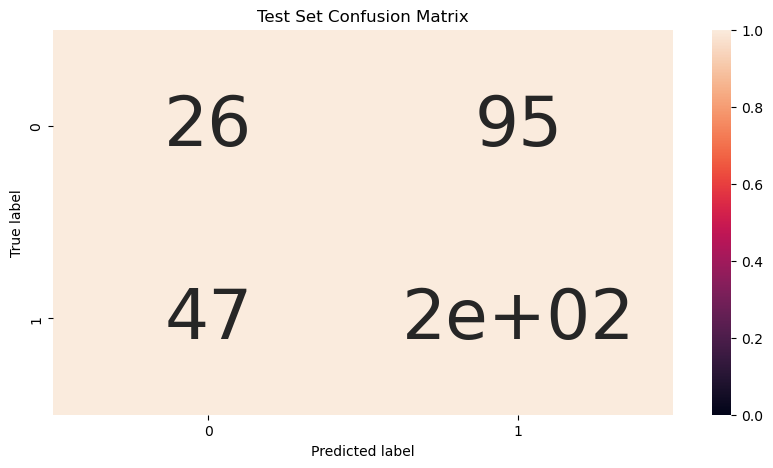

In [36]:
y_pred = knn_clf.predict(X_test)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,5))
plot_confusion_matrix(cm, classes=knn_clf.classes_, title='Test Set Confusion Matrix')